In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5
    


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/samarpan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-27 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = '/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/images/tester.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 1021x1532 5 persons, 15 cars, 4 buss, 5 trucks, 3 traffic lights
Speed: 59.5ms pre-process, 291.2ms inference, 11.8ms NMS per image at shape (1, 3, 448, 640)


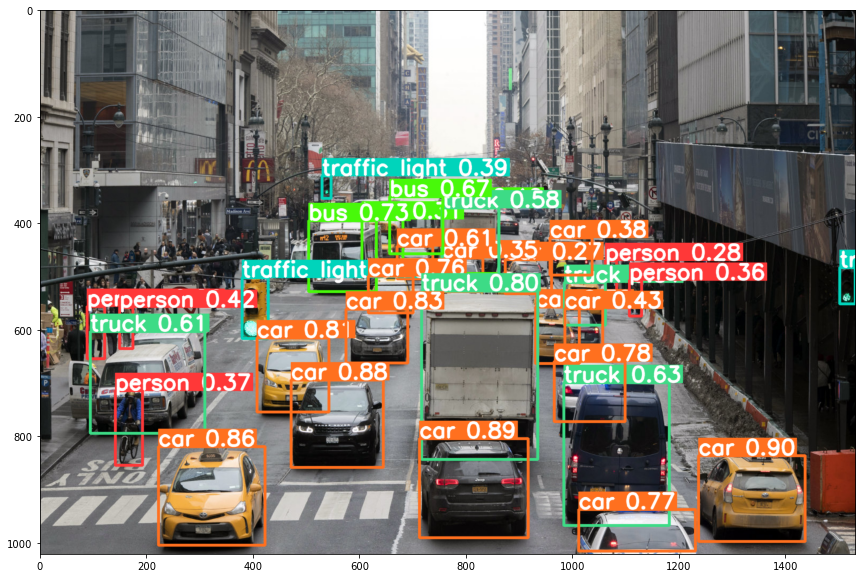

In [9]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results.render()))

plt.show()

In [10]:
results.xyxy

[tensor([[1.23615e+03, 8.36395e+02, 1.43633e+03, 9.97456e+02, 9.03800e-01, 2.00000e+00],
         [7.12554e+02, 8.04366e+02, 9.16554e+02, 9.90495e+02, 8.89779e-01, 2.00000e+00],
         [4.71484e+02, 6.94344e+02, 6.44111e+02, 8.58875e+02, 8.84194e-01, 2.00000e+00],
         [2.22496e+02, 8.19539e+02, 4.22701e+02, 1.00462e+03, 8.62561e-01, 2.00000e+00],
         [5.74958e+02, 5.61332e+02, 6.90501e+02, 6.62630e+02, 8.30696e-01, 2.00000e+00],
         [4.07556e+02, 6.15674e+02, 5.42867e+02, 7.54283e+02, 8.07446e-01, 2.00000e+00],
         [7.16141e+02, 5.27542e+02, 9.34188e+02, 8.43311e+02, 7.99769e-01, 7.00000e+00],
         [9.65977e+02, 6.59502e+02, 1.09834e+03, 7.72888e+02, 7.82973e-01, 2.00000e+00],
         [1.01127e+03, 9.37813e+02, 1.23063e+03, 1.01557e+03, 7.72787e-01, 2.00000e+00],
         [6.16932e+02, 4.99633e+02, 7.00980e+02, 5.68278e+02, 7.61454e-01, 2.00000e+00],
         [3.79333e+02, 5.02917e+02, 4.28460e+02, 6.16982e+02, 7.32326e-01, 9.00000e+00],
         [5.04055e+02

In [11]:
results.render()

[array([[[161, 157, 148],
         [152, 148, 139],
         [162, 158, 149],
         ...,
         [ 18,  18,  18],
         [ 12,  12,  12],
         [ 13,  13,  13]],
 
        [[159, 155, 146],
         [151, 147, 138],
         [161, 157, 148],
         ...,
         [ 19,  19,  19],
         [ 14,  14,  14],
         [ 14,  14,  14]],
 
        [[157, 153, 144],
         [149, 145, 136],
         [160, 156, 147],
         ...,
         [ 18,  18,  18],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        ...,
 
        [[102, 103, 105],
         [102, 103, 105],
         [104, 105, 107],
         ...,
         [166, 161, 155],
         [180, 177, 172],
         [174, 173, 169]],
 
        [[102, 103, 105],
         [103, 104, 106],
         [104, 105, 107],
         ...,
         [145, 142, 137],
         [160, 159, 154],
         [179, 178, 174]],
 
        [[104, 104, 104],
         [105, 105, 105],
         [106, 106, 106],
         ...,
         [154, 153, 149],
  

In [12]:
''''
cap = cv2.VideoCapture(0) # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()
''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-12-77c05dc9924e>, line 15)

In [13]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 25

In [15]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.fbe5b8f8-3e99-11ed-bdf2-6e398c2a0c80.jpg


In [16]:
'''
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
            
cap.release()
cv2.destroyAllWindows()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-16-5133ed9c2637>, line 32)

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.01be497a-3e9a-11ed-bdf2-6e398c2a0c80.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.022ec420-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ec7e0-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022eca60-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ecce0-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ecf4c-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ed1c2-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ed424-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022edc62-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022edeec-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ee162-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022eeec8-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ef198-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ef44a-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ef6b6-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022ef922-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022efb8e-3e9a-11ed-bdf2-6e398c2a0c80.jpg
data/images/awake.022efdf0-3e9a-11ed-bdf2-6e398c2a0c80.j

In [19]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
!pip3 install pyqt5 lxml

In [90]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [91]:
#conda install nomkl

In [22]:
'''
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 600 --data dataset.yml --weights yolov5s.pt --workers 2

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-22-ccace6fb2afa>, line 2)

In [23]:
#/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/Code/yolov5/runs/train/exp7/weights/last.pt
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/samarpan/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-28 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [24]:
img1 = os.path.join('data', 'images', 'awake.40fe5c80-3e4d-11ed-9935-6e398c2a0c80.jpg')
img2 = os.path.join('data', 'images', 'drowsy.593e5fa2-3e4d-11ed-9935-6e398c2a0c80.jpg')

In [25]:
#awake.2cfa9a00-3e4d-11ed-9935-6e398c2a0c80

In [26]:
results1 = model(img1)

In [27]:
results1.print()

image 1/1: 720x1280 1 awake
Speed: 39.3ms pre-process, 226.4ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


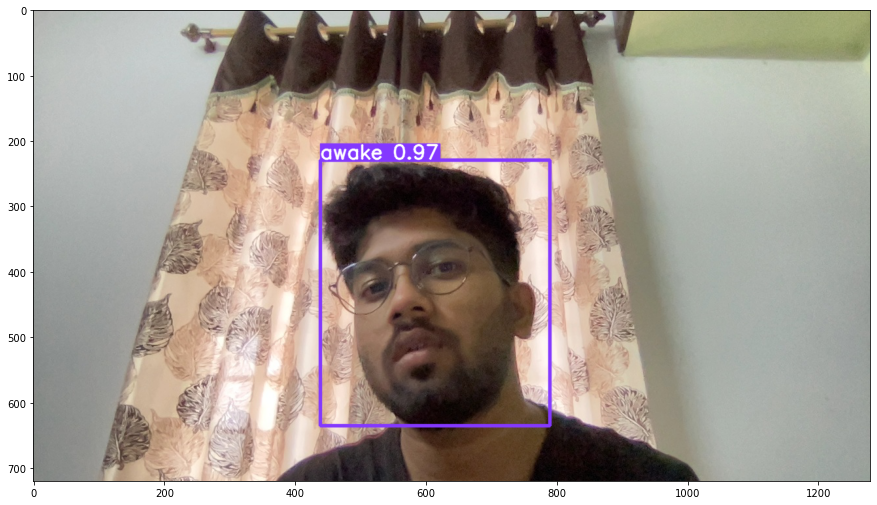

In [28]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [29]:
results2 = model(img2)
results2.print()

image 1/1: 720x1280 1 drowsy
Speed: 31.7ms pre-process, 176.9ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


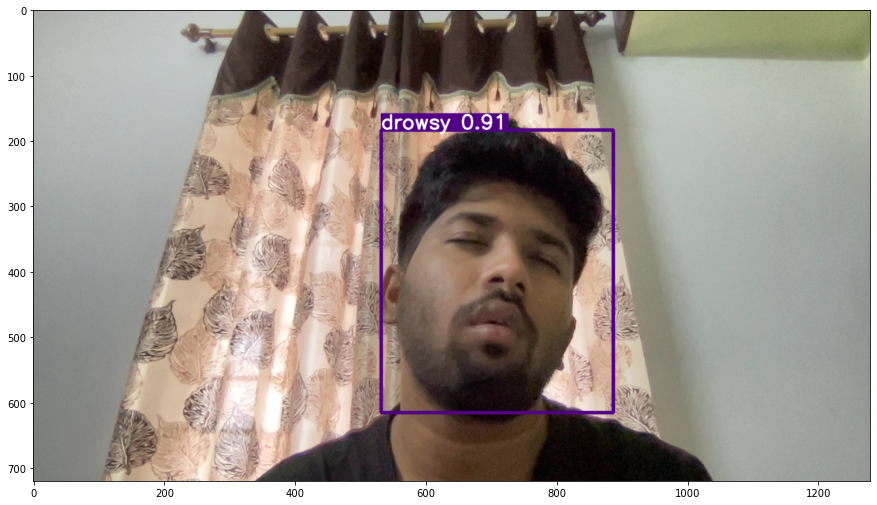

In [30]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [31]:
'''
cap = cv2.VideoCapture(0) # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-31-a308f7dd2db8>, line 14)